In [116]:
from PIL import Image
import glob
import cv2
import numpy as np

In [117]:
imgs = [Image.open(file) for file in glob.glob('/Users/chaofeng/Desktop/imgs_de/corn/*.jpg')]

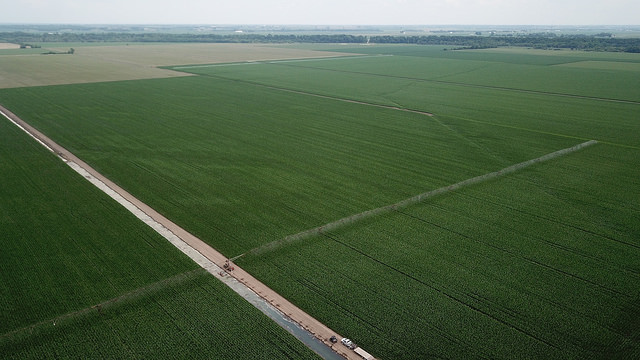

In [118]:
imgs[0]

In [119]:
i0 = np.asarray(imgs[0])

In [120]:
i0.shape

(360, 640, 3)

In [121]:
images = [cv2.imread(file) for file in glob.glob('/Users/chaofeng/Desktop/imgs_de/corn/*.jpg')]

In [122]:
images[0]

array([[[225, 220, 211],
        [225, 220, 211],
        [225, 220, 211],
        ...,
        [226, 220, 213],
        [226, 221, 212],
        [226, 221, 212]],

       [[225, 220, 211],
        [225, 220, 211],
        [225, 220, 211],
        ...,
        [225, 219, 212],
        [225, 219, 212],
        [225, 220, 211]],

       [[225, 220, 211],
        [225, 220, 211],
        [225, 220, 211],
        ...,
        [224, 218, 211],
        [224, 218, 211],
        [224, 218, 211]],

       ...,

       [[ 26,  49,  34],
        [ 16,  37,  22],
        [  0,  21,   6],
        ...,
        [ 20,  36,  25],
        [ 15,  30,  22],
        [  5,  20,  12]],

       [[ 12,  35,  20],
        [  9,  32,  17],
        [ 13,  34,  19],
        ...,
        [ 21,  34,  26],
        [  1,  16,   8],
        [ 31,  46,  38]],

       [[ 21,  44,  29],
        [ 29,  52,  37],
        [ 28,  49,  34],
        ...,
        [ 11,  24,  16],
        [  8,  23,  15],
        [ 30,  45,  37]]

In [123]:
images[0].shape

(360, 640, 3)

In [124]:
res = cv2.resize(images[0], dsize=(224, 224), interpolation=cv2.INTER_CUBIC)

In [125]:
res.shape

(224, 224, 3)

In [126]:
#cv2.imshow('Window',res)
#cv2.waitKey(0)

In [127]:
arrs = [np.random.random((32, 32, 3)) for i in range(50)]
res = np.concatenate([arr[np.newaxis] for arr in arrs])
res.shape

(50, 32, 32, 3)

In [272]:
catog = ['alfalfa','barley','corn','soybean','wheat']

In [273]:
x_train = np.empty((0,224,224,3),dtype='uint8')
x_test = np.empty((0,224,224,3),dtype='uint8')
y_train = np.empty((0,5),dtype='uint8')
y_test = np.empty((0,5),dtype='uint8')

In [274]:

for i in range(len(catog)):
    datai = []
    for file in glob.glob('/Users/chaofeng/Desktop/imgs_de/' + catog[i] + '/*.jpg'):
        im = cv2.imread(file)
        im2 = cv2.resize(im, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
        datai.append(im2)
    xi = np.concatenate([l[np.newaxis] for l in datai])
    print(xi.shape)
    yi = np.full((xi.shape[0],5), np.identity(5)[i])
    print(yi.shape)
    itrain_len = round(xi.shape[0]/3*2)
    itest_len = xi.shape[0] - itrain_len
    #print(itrain_len)
    #print(itest_len)
    xi_train = xi[:itrain_len]
    xi_test = xi[itrain_len:]
    print (xi_train.shape)
    print (xi_test.shape)
    yi_train = yi[:itrain_len]
    yi_test = yi[:itest_len]
    print (yi_train.shape)
    print (yi_test.shape)
    print('---------------------')
    #x_train = np.vstack((x_train, xi_train))
    #result_array = np.append(result_array, [result], axis=0)
    #x_train1.append(xi_train)
    #x_train = np.stack((x_train, xi_train))
    x_train = np.concatenate([x_train, xi_train], axis=0)
    x_test = np.concatenate([x_test, xi_test], axis=0)
    y_train = np.concatenate([y_train, yi_train], axis=0)
    y_test = np.concatenate([y_test, yi_test], axis=0)

(41, 224, 224, 3)
(41, 5)
(27, 224, 224, 3)
(14, 224, 224, 3)
(27, 5)
(14, 5)
---------------------
(39, 224, 224, 3)
(39, 5)
(26, 224, 224, 3)
(13, 224, 224, 3)
(26, 5)
(13, 5)
---------------------
(48, 224, 224, 3)
(48, 5)
(32, 224, 224, 3)
(16, 224, 224, 3)
(32, 5)
(16, 5)
---------------------
(55, 224, 224, 3)
(55, 5)
(37, 224, 224, 3)
(18, 224, 224, 3)
(37, 5)
(18, 5)
---------------------
(47, 224, 224, 3)
(47, 5)
(31, 224, 224, 3)
(16, 224, 224, 3)
(31, 5)
(16, 5)
---------------------


In [276]:
x_train.shape

(153, 224, 224, 3)

In [277]:
x_test.shape

(77, 224, 224, 3)

In [278]:
y_train.shape

(153, 5)

In [279]:
y_test.shape

(77, 5)

In [216]:
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [211]:
#data0 = np.concatenate([cv2.imread(file) for file in glob.glob('/Users/chaofeng/Desktop/imgs_de/alfalfa/*.jpg')])

data0a = [cv2.imread(file) for file in glob.glob('/Users/chaofeng/Desktop/imgs_de/' + catog[0] + '/*.jpg')]
data0b = [cv2.resize(im, dsize=(224, 224), interpolation=cv2.INTER_CUBIC) for im in data0a]
x0 = np.concatenate([l[np.newaxis] for l in data0b])

In [212]:
x0.shape

(41, 224, 224, 3)

In [213]:
y0 = np.full((data0.shape[0],5), [0,0,0,0,1])
y0.shape

(41, 5)

In [197]:
y0

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [131]:
l1a = [cv2.imread(file) for file in glob.glob('/Users/chaofeng/Desktop/imgs_de/barley/*.jpg')]
l1b = [cv2.resize(im, dsize=(224, 224), interpolation=cv2.INTER_CUBIC) for im in l1a]
data1 = np.concatenate([l[np.newaxis] for l in l1b])

In [198]:
y1 = np.full((data1.shape[0],5), [0,0,0,1,0])
y1.shape

(39, 5)

In [200]:
y1

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]])

In [199]:
l2a = [cv2.imread(file) for file in glob.glob('/Users/chaofeng/Desktop/imgs_de/corn/*.jpg')]
l2b = [cv2.resize(im, dsize=(224, 224), interpolation=cv2.INTER_CUBIC) for im in l1a]
data2 = np.concatenate([l[np.newaxis] for l in l2b])
data2.shape

(39, 224, 224, 3)

In [186]:
y2 = np.full((data2.shape[0]), 2)

In [187]:
y2

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [386]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [387]:
image_gen = ImageDataGenerator(
    #featurewise_center=True,
    #featurewise_std_normalization=True,
    rescale=1./255,
    rotation_range=15,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True)

#training the image preprocessing
image_gen.fit(x_train, augment=True)

In [339]:
model = Sequential()

In [340]:
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(5, activation='softmax'))
model.add(Dense(5, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [341]:
#model.fit(data0, y0, batch_size=32, epochs=10)

In [342]:
#score = model.evaluate(data1, y1, batch_size=32)

In [343]:
#model.fit(x_train, y_train, batch_size=64, epochs=8)

In [365]:
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

In [376]:
history = AccuracyHistory()

In [390]:
myepoch = 10;mybatchsize=64

In [378]:
model.fit(x_train, y_train, batch_size=64, epochs=myepoch,verbose=1,validation_data=(x_test, y_test),callbacks=[history])

Train on 153 samples, validate on 77 samples
Epoch 1/10
153/153 [==============================] - 19s 121ms/step - loss: 12.3256 - acc: 0.2353 - val_loss: 12.7689 - val_acc: 0.2078
Epoch 2/10
153/153 [==============================] - 18s 115ms/step - loss: 12.8523 - acc: 0.2026 - val_loss: 12.7689 - val_acc: 0.2078
Epoch 3/10
153/153 [==============================] - 17s 114ms/step - loss: 12.8523 - acc: 0.2026 - val_loss: 12.7689 - val_acc: 0.2078
Epoch 4/10
153/153 [==============================] - 17s 114ms/step - loss: 13.1684 - acc: 0.1830 - val_loss: 12.7689 - val_acc: 0.2078
Epoch 5/10
153/153 [==============================] - 18s 115ms/step - loss: 12.9577 - acc: 0.1961 - val_loss: 12.7689 - val_acc: 0.2078
Epoch 6/10
153/153 [==============================] - 17s 113ms/step - loss: 12.9577 - acc: 0.1961 - val_loss: 12.7689 - val_acc: 0.2078
Epoch 7/10
153/153 [==============================] - 17s 113ms/step - loss: 13.0630 - acc: 0.1895 - val_loss: 12.7689 - val_acc: 0.2

In [391]:
model.fit_generator(image_gen.flow(x_train, y_train, batch_size=mybatchsize),
                    steps_per_epoch = x_train.shape[0]//mybatchsize,
                    epochs=myepoch,
                    verbose=1,
                    validation_data=(x_test, y_test),callbacks=[history])

Epoch 1/10
2/2 [==============================] - 19s 10s/step - loss: 12.2145 - acc: 0.2422 - val_loss: 12.7689 - val_acc: 0.2078
Epoch 2/10
2/2 [==============================] - 12s 6s/step - loss: 13.4162 - acc: 0.1676 - val_loss: 12.7689 - val_acc: 0.2078
Epoch 3/10
2/2 [==============================] - 11s 6s/step - loss: 13.3253 - acc: 0.1733 - val_loss: 12.7689 - val_acc: 0.2078
Epoch 4/10
2/2 [==============================] - 16s 8s/step - loss: 13.0960 - acc: 0.1875 - val_loss: 12.7689 - val_acc: 0.2078
Epoch 5/10
2/2 [==============================] - 12s 6s/step - loss: 11.7512 - acc: 0.2709 - val_loss: 12.7689 - val_acc: 0.2078
Epoch 6/10
2/2 [==============================] - 11s 6s/step - loss: 13.0099 - acc: 0.1928 - val_loss: 12.7689 - val_acc: 0.2078
Epoch 7/10
2/2 [==============================] - 18s 9s/step - loss: 13.3478 - acc: 0.1719 - val_loss: 12.7689 - val_acc: 0.2078
Epoch 8/10
2/2 [==============================] - 12s 6s/step - loss: 13.8491 - acc: 0.14

In [392]:
score = model.evaluate(x_test, y_test, batch_size=32, verbose=0)

In [393]:
score

[12.768880492681033, 0.2077922077922078]

In [394]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 12.768880492681033
Test accuracy: 0.2077922077922078


In [395]:
import matplotlib.pyplot as plt

In [396]:
history.acc

[0.2421875,
 0.17977528014544691,
 0.14606741606519463,
 0.1875,
 0.2584269642829895,
 0.19101123679220006,
 0.171875,
 0.1460674149769076,
 0.28089888042278505,
 0.171875]

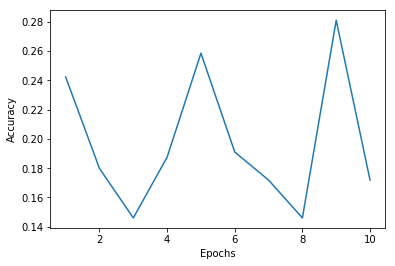

In [397]:
plt.plot(range(1,myepoch+1), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()